# Average House Sale Prices forecast in Fairfield

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('Fairfield.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,369587.11,607031.57,Fairfield
1,2001-02-01,351716.13,612695.88,Fairfield
2,2001-03-01,375670.85,581427.50,Fairfield
3,2001-04-01,372628.98,579640.90,Fairfield
4,2001-05-01,401488.72,576070.59,Fairfield


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,369587.11,607031.57
1,2001-02-01,351716.13,612695.88
2,2001-03-01,375670.85,581427.50
3,2001-04-01,372628.98,579640.90
4,2001-05-01,401488.72,576070.59


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [34]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [35]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,607031.57
1,2001-02-01,612695.88
2,2001-03-01,581427.50
3,2001-04-01,579640.90
4,2001-05-01,576070.59


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
average_data.columns=['ds','y']

In [37]:
average_data

,ds,y
0,2001-01-01,607031.57
1,2001-02-01,612695.88
2,2001-03-01,581427.50
3,2001-04-01,579640.90
4,2001-05-01,576070.59
...,...,...
245,2021-06-01,843103.42
246,2021-07-01,883779.04
247,2021-08-01,807179.08
248,2021-09-01,689336.69


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,795182.899992,715453.149862,872892.883194
270,2023-06-30,820344.571014,744767.133637,900128.479601
271,2023-07-31,797051.236495,717263.743205,881500.512304
272,2023-08-31,705444.756498,627149.569942,786048.222409
273,2023-09-30,710610.019664,638100.373532,787055.706098


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,586652.431179,455628.142064,615559.419172,586652.431179,586652.431179,-50085.293569,-50085.293569,-50085.293569,-50085.293569,-50085.293569,-50085.293569,0.0,0.0,0.0,536567.137611
1,2001-02-01,591129.175204,486625.731184,642755.212757,591129.175204,591129.175204,-31968.765176,-31968.765176,-31968.765176,-31968.765176,-31968.765176,-31968.765176,0.0,0.0,0.0,559160.410029
2,2001-03-01,595172.685936,474554.450263,624469.369037,595172.685936,595172.685936,-42522.348936,-42522.348936,-42522.348936,-42522.348936,-42522.348936,-42522.348936,0.0,0.0,0.0,552650.337000
3,2001-04-01,599649.429961,505330.554506,659970.803038,599649.429961,599649.429961,-13586.235805,-13586.235805,-13586.235805,-13586.235805,-13586.235805,-13586.235805,0.0,0.0,0.0,586063.194156
4,2001-05-01,603981.762888,551061.330028,710819.624738,603981.762888,603981.762888,23968.243844,23968.243844,23968.243844,23968.243844,23968.243844,23968.243844,0.0,0.0,0.0,627950.006732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,730885.002327,715453.149862,872892.883194,721269.671434,742943.953968,64297.897665,64297.897665,64297.897665,64297.897665,64297.897665,64297.897665,0.0,0.0,0.0,795182.899992
270,2023-06-30,732890.657179,744767.133637,900128.479601,722331.152577,745895.903218,87453.913835,87453.913835,87453.913835,87453.913835,87453.913835,87453.913835,0.0,0.0,0.0,820344.571014
271,2023-07-31,734963.167192,717263.743205,881500.512304,723138.885241,749086.669841,62088.069303,62088.069303,62088.069303,62088.069303,62088.069303,62088.069303,0.0,0.0,0.0,797051.236495
272,2023-08-31,737035.677205,627149.569942,786048.222409,724412.793804,752069.847773,-31590.920706,-31590.920706,-31590.920706,-31590.920706,-31590.920706,-31590.920706,0.0,0.0,0.0,705444.756498


## Plotting the forecast data

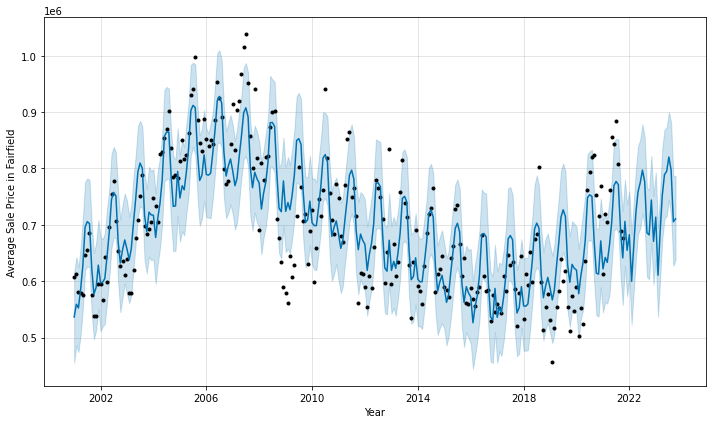

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

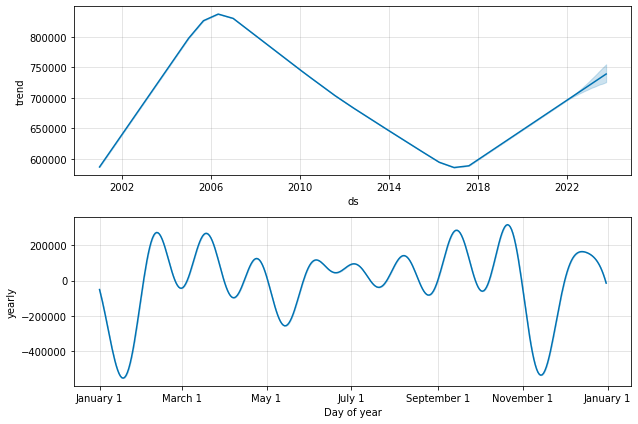

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,1.013611e+10,100678.273888,75622.044285,0.102874,0.079363,0.107568,0.522727
1,40 days,9.988173e+09,99940.847757,74641.202084,0.101263,0.077456,0.105668,0.545455
2,42 days,9.951201e+09,99755.707704,73951.881427,0.100421,0.077456,0.104786,0.545455
3,44 days,9.865580e+09,99325.625718,74142.811248,0.100799,0.082440,0.104819,0.545455
4,45 days,1.012033e+10,100599.837766,76324.983331,0.103931,0.084871,0.107893,0.522727


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.89712564350513%
Horizon: 40 days 00:00:00, Accuracy: 99.89873670241859%
Horizon: 42 days 00:00:00, Accuracy: 99.89957907932045%
Horizon: 44 days 00:00:00, Accuracy: 99.89920120101594%
Horizon: 45 days 00:00:00, Accuracy: 99.89606888576031%
Horizon: 46 days 00:00:00, Accuracy: 99.89798042789181%
Horizon: 47 days 00:00:00, Accuracy: 99.8994334558341%
Horizon: 49 days 00:00:00, Accuracy: 99.89924948045724%
Horizon: 50 days 00:00:00, Accuracy: 99.90197320138118%
Horizon: 51 days 00:00:00, Accuracy: 99.90427681799778%
Horizon: 52 days 00:00:00, Accuracy: 99.90513783986854%
Horizon: 54 days 00:00:00, Accuracy: 99.90492876864734%
Horizon: 55 days 00:00:00, Accuracy: 99.90936451373295%
Horizon: 56 days 00:00:00, Accuracy: 99.90973413724141%
Horizon: 58 days 00:00:00, Accuracy: 99.90722411838897%
Horizon: 60 days 00:00:00, Accuracy: 99.90703327170338%
Horizon: 61 days 00:00:00, Accuracy: 99.90383913777356%
Horizon: 62 days 00:00:00, Accuracy: 99.905045449

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

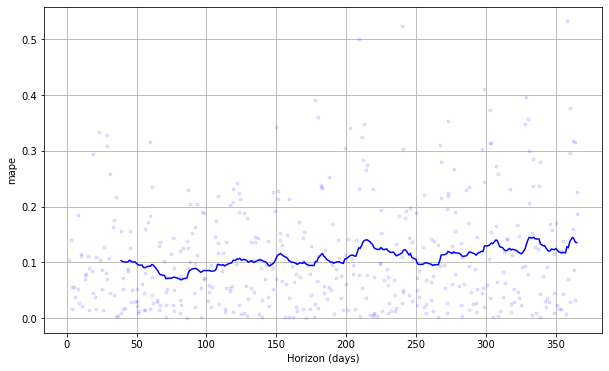

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 70-80.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)